In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
seattle_train = pd.read_csv('seattle_train.csv')
seattle_test = pd.read_csv('seattle_test.csv')

In [3]:
seattle_train.head()

,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True
2,2,1948-01-03,0.42,45,35,True
3,3,1948-01-04,0.31,45,34,True
4,4,1948-01-05,0.17,45,32,True


In [4]:
seattle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


In [5]:
seattle_train.isna().sum()

Id      0
DATE    0
PRCP    2
TMAX    0
TMIN    0
RAIN    2
dtype: int64

In [6]:
seattle_train['RAIN'] = seattle_train['RAIN'].fillna(seattle_train['RAIN'].mode()[0])
seattle_train['PRCP'].fillna(seattle_train['PRCP'].median(), inplace = True)

In [7]:
seattle_train['RAIN'].value_counts()

False    11773
True      8667
Name: RAIN, dtype: int64

In [8]:
print('Tmax:', seattle_train['TMAX'].min())
print('Tmax:', seattle_train['TMAX'].max())

Tmax: 4
Tmax: 100


In [9]:
print('Tmin:', seattle_train['TMIN'].min())
print('Tmin:', seattle_train['TMIN'].max())

Tmin: 0
Tmin: 69


In [10]:
print('Precipitation Max :', seattle_train['PRCP'].min())
print('Precipiatation Min:', seattle_train['PRCP'].max())

Precipitation Max : 0.0
Precipiatation Min: 5.02


In [11]:
seattle_train['DATE'] = pd.to_datetime(seattle_train['DATE'], format='%Y/%m/%d')

In [12]:
seattle_train['DATE'].dt.year

0        1948
1        1948
2        1948
3        1948
4        1948
         ... 
20435    2003
20436    2003
20437    2003
20438    2003
20439    2003
Name: DATE, Length: 20440, dtype: int64

In [13]:
seattle_train['DATE'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
20435    12
20436    12
20437    12
20438    12
20439    12
Name: DATE, Length: 20440, dtype: int64

In [14]:
seattle_train['DATE'].dt.day

0         1
1         2
2         3
3         4
4         5
         ..
20435    13
20436    14
20437    15
20438    16
20439    17
Name: DATE, Length: 20440, dtype: int64

In [15]:
seattle_train['Year'] = seattle_train['DATE'].dt.year
seattle_train['Month'] = seattle_train['DATE'].dt.month
seattle_train['Day'] = seattle_train['DATE'].dt.day

In [16]:
seattle_train.head()

,Id,DATE,PRCP,TMAX,TMIN,RAIN,Year,Month,Day
0,0,1948-01-01,0.47,51,42,True,1948,1,1
1,1,1948-01-02,0.59,45,36,True,1948,1,2
2,2,1948-01-03,0.42,45,35,True,1948,1,3
3,3,1948-01-04,0.31,45,34,True,1948,1,4
4,4,1948-01-05,0.17,45,32,True,1948,1,5


In [17]:
seattle_train.drop(['Id', 'DATE'], axis = 1, inplace = True)

In [18]:
seattle_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    20440 non-null  float64
 1   TMAX    20440 non-null  int64  
 2   TMIN    20440 non-null  int64  
 3   RAIN    20440 non-null  bool   
 4   Year    20440 non-null  int64  
 5   Month   20440 non-null  int64  
 6   Day     20440 non-null  int64  
dtypes: bool(1), float64(1), int64(5)
memory usage: 978.2 KB


<AxesSubplot:xlabel='RAIN', ylabel='TMAX'>

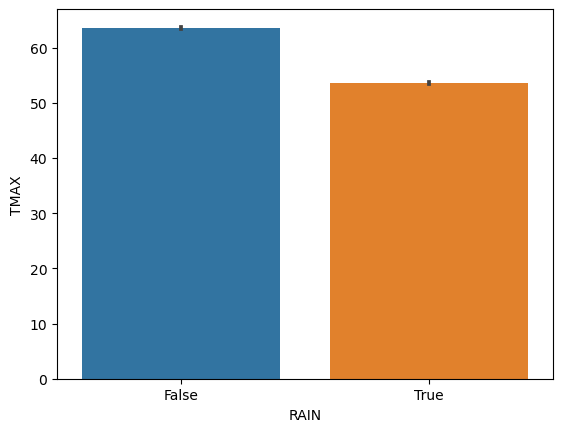

In [19]:
sns.barplot(data = seattle_train, x = 'RAIN', y = 'TMAX')

<AxesSubplot:xlabel='RAIN', ylabel='TMIN'>

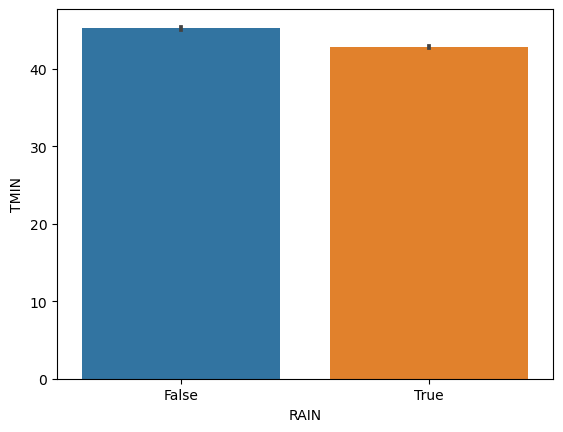

In [20]:
sns.barplot(data = seattle_train, x = 'RAIN', y = 'TMIN')

<AxesSubplot:xlabel='PRCP', ylabel='TMAX'>

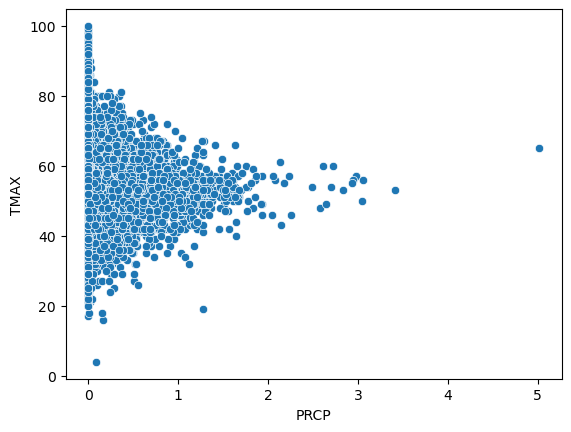

In [21]:
sns.scatterplot(data = seattle_train, x = 'PRCP', y = 'TMAX')

<AxesSubplot:xlabel='PRCP', ylabel='TMIN'>

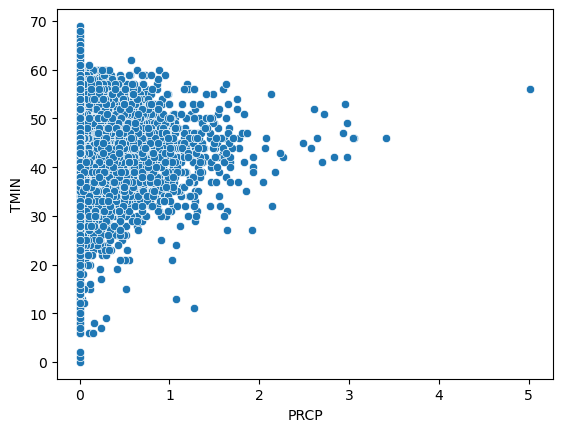

In [22]:
sns.scatterplot(data = seattle_train, x = 'PRCP', y = 'TMIN')

<AxesSubplot:xlabel='Year', ylabel='PRCP'>

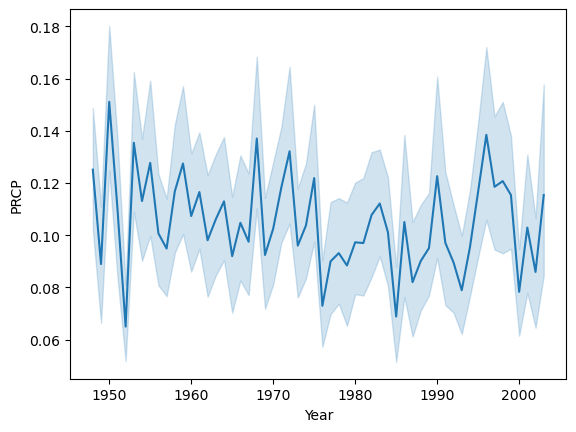

In [23]:
sns.lineplot(data= seattle_train, x = 'Year', y ='PRCP')

<AxesSubplot:xlabel='RAIN', ylabel='Year'>

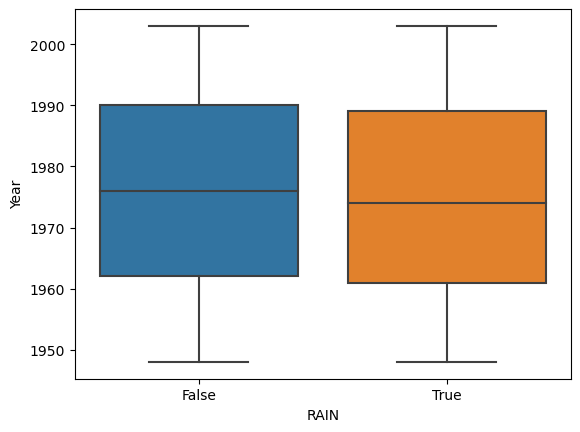

In [24]:
sns.boxplot(data = seattle_train, x = 'RAIN', y = 'Year')

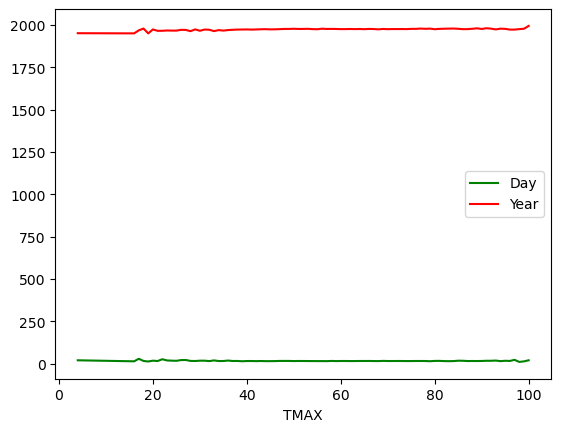

In [25]:
seattle_train.groupby(by=['TMAX'])['Day'].mean().plot.line(color='green')
seattle_train.groupby(by=['TMAX'])['Year'].mean().plot.line(color='red')
plt.legend()

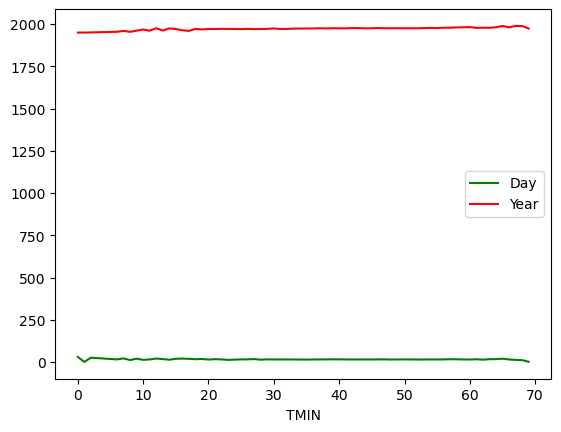

In [26]:
seattle_train.groupby(by=['TMIN'])['Day'].mean().plot.line(color='green')
seattle_train.groupby(by=['TMIN'])['Year'].mean().plot.line(color='red')
plt.legend()

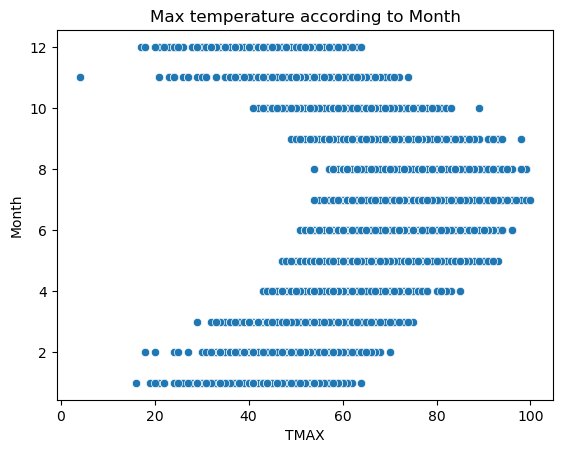

In [27]:
sns.scatterplot(x='TMAX', y='Month', data=seattle_train, palette = "rocket")
plt.title('Max temperature according to Month')
plt.show()

<AxesSubplot:xlabel='Day', ylabel='TMAX'>

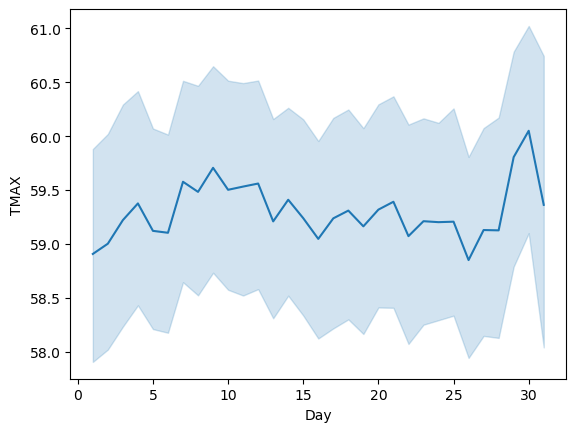

In [28]:
sns.lineplot(data= seattle_train, x = 'Day', y ='TMAX')

<AxesSubplot:xlabel='Day', ylabel='TMIN'>

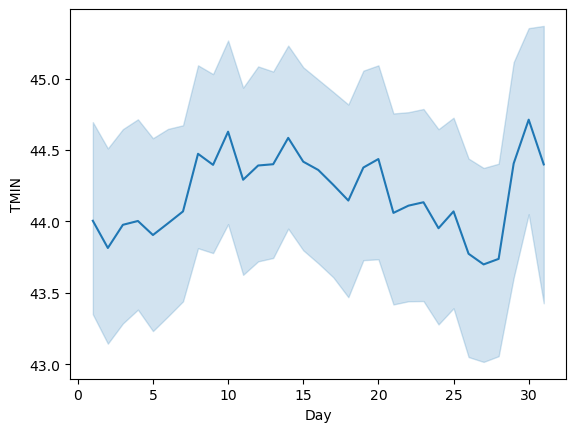

In [29]:
sns.lineplot(data= seattle_train, x = 'Day', y ='TMIN')

<AxesSubplot:xlabel='Month', ylabel='TMAX'>

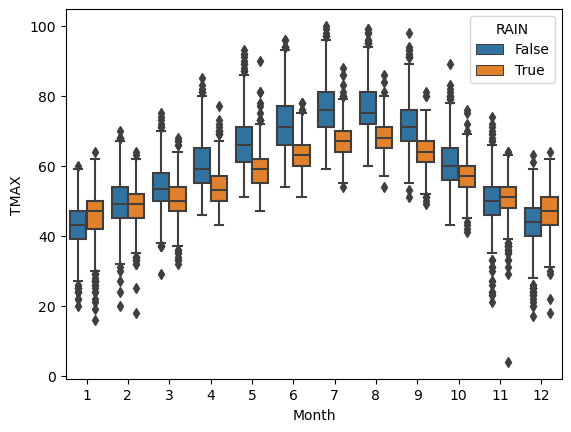

In [30]:
sns.boxplot(data = seattle_train, x = 'Month', y = 'TMAX', hue = 'RAIN')

<AxesSubplot:xlabel='Month', ylabel='TMIN'>

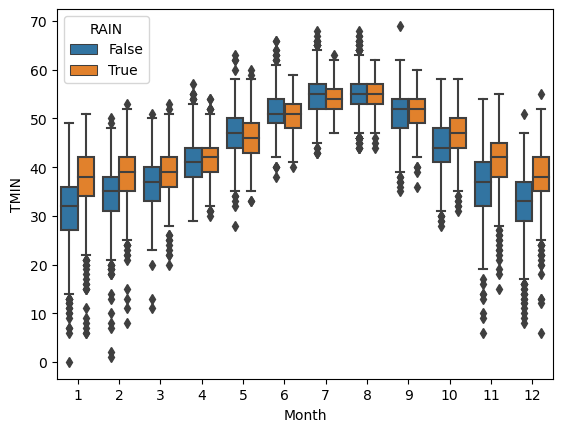

In [31]:
sns.boxplot(data = seattle_train, x = 'Month', y = 'TMIN', hue = 'RAIN')

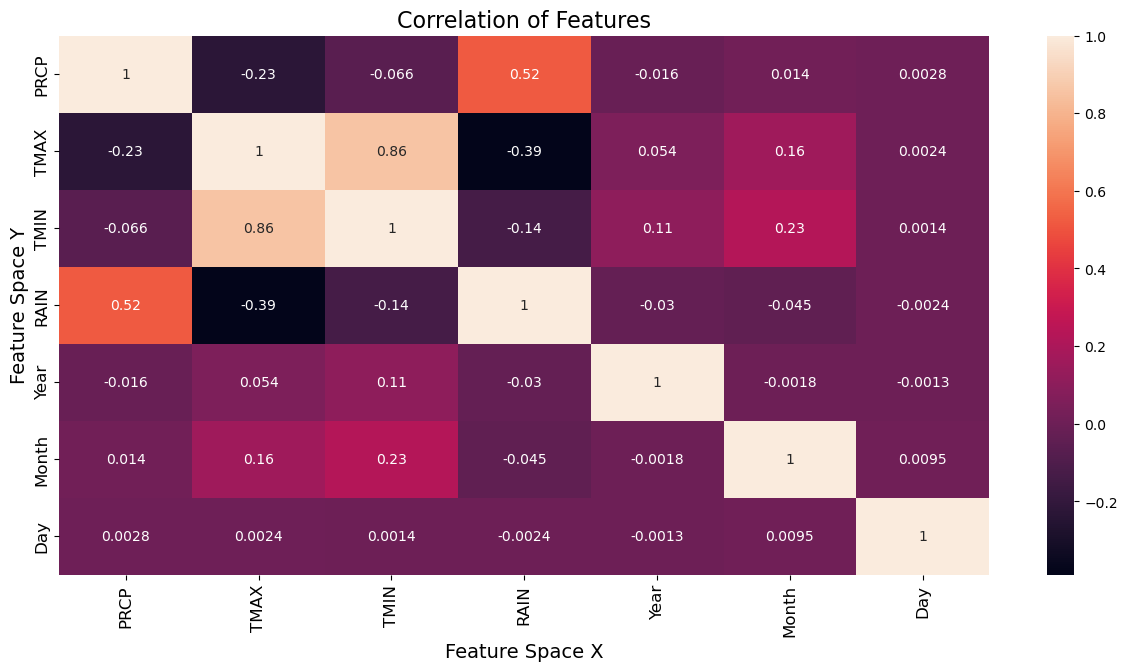

In [32]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data=seattle_train.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()


PRCP


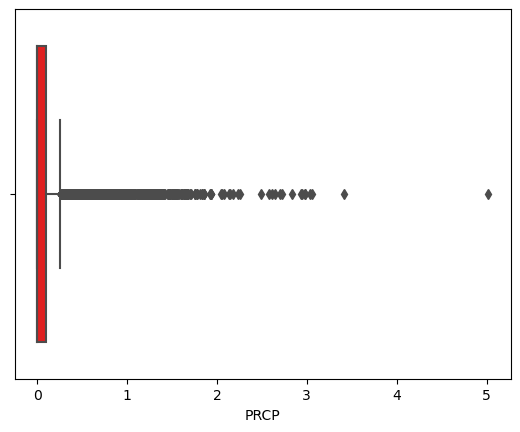

TMAX


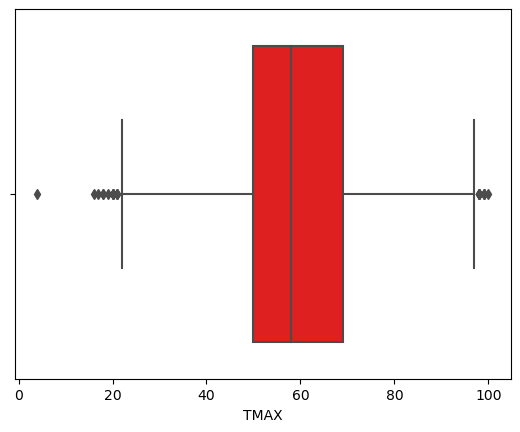

TMIN


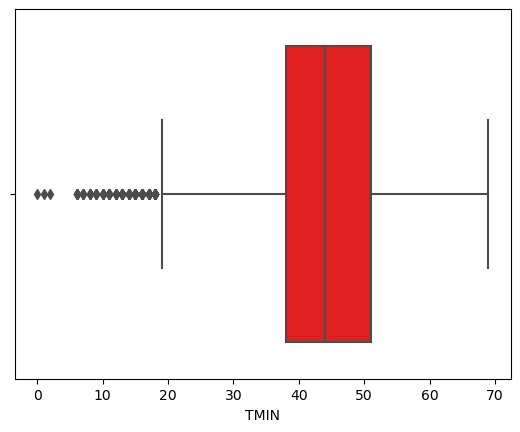

In [33]:
for col in seattle_train.iloc[:,:3].columns:
    print(col)
    sns.boxplot(x = seattle_train[col], data = seattle_train, color = 'red')
    plt.show()

In [34]:
def Outlier(var):
    for x in var.iloc[:, :3].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(seattle_train)

PRCP


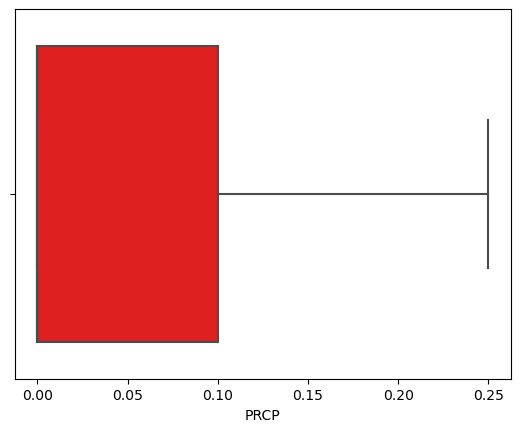

TMAX


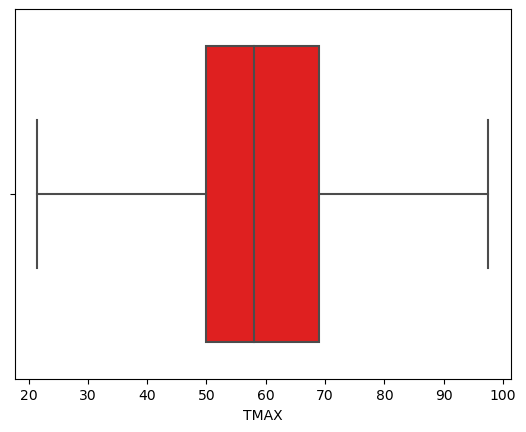

TMIN


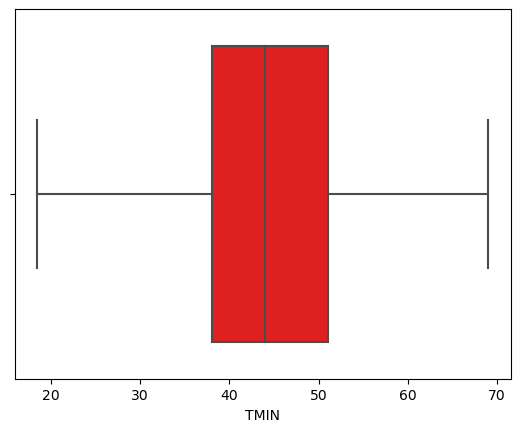

In [35]:
for col in seattle_train.iloc[:,:3].columns:
    print(col)
    sns.boxplot(x = seattle_train[col], data = seattle_train, color = 'red')
    plt.show()

In [36]:
df_train.drop(['Year', 'Month', 'Day'], axis = 1, inplace = True)

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['RAIN'] = le.fit_transform(df_train['RAIN'])

In [38]:
df_train.head()

,PRCP,TMAX,TMIN,RAIN
0,0.25,51.0,42.0,1
1,0.25,45.0,36.0,1
2,0.25,45.0,35.0,1
3,0.25,45.0,34.0,1
4,0.17,45.0,32.0,1


# Train-Test Split :

In [39]:
x = df_train.drop('RAIN', axis = 1)
y = df_train['RAIN']

In [40]:
x

,PRCP,TMAX,TMIN
0,0.25,51.0,42.0
1,0.25,45.0,36.0
2,0.25,45.0,35.0
3,0.25,45.0,34.0
4,0.17,45.0,32.0
...,...,...,...
20435,0.25,48.0,39.0
20436,0.07,43.0,36.0
20437,0.01,45.0,38.0
20438,0.07,51.0,41.0


In [41]:
y

0        1
1        1
2        1
3        1
4        1
        ..
20435    1
20436    1
20437    1
20438    1
20439    0
Name: RAIN, Length: 20440, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16352, 3)
(4088, 3)
(16352,)
(4088,)


In [44]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Freature Selection :

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 1
Threshold set by Model: 0.33
Important Features: ['PRCP']


# Feature Importance :

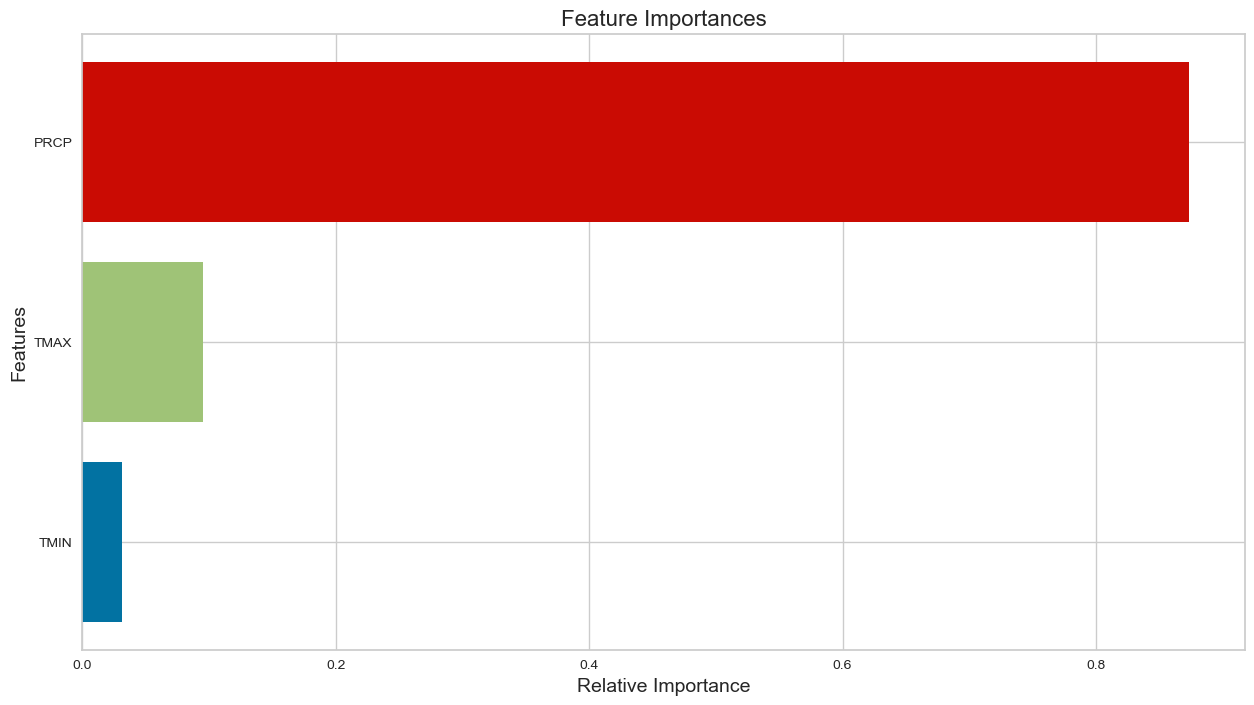

In [47]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

# Modelling :

# 1.Logistic Regression :

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [49]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.9891144814090019

In [50]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

0.9916829745596869

In [51]:
y_pred_train = log_reg.predict(x_train)
y_pred_test = log_reg.predict(x_test)

In [52]:
def modelEval(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    class_rep = classification_report(actual, predicted)
    print(cm)
    print('The accuracy of the Model is :', accuracy)
    print(class_rep)

# Model Evaluation :

In [53]:
print('                    Training Report           ')
modelEval(y_train, y_pred_train)

                    Training Report           
[[9389    0]
 [ 178 6785]]
The accuracy of the Model is : 0.9891144814090019
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9389
           1       1.00      0.97      0.99      6963

    accuracy                           0.99     16352
   macro avg       0.99      0.99      0.99     16352
weighted avg       0.99      0.99      0.99     16352



In [54]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_test)

               Testing Report                            
[[2384    0]
 [  34 1670]]
The accuracy of the Model is : 0.9916829745596869
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2384
           1       1.00      0.98      0.99      1704

    accuracy                           0.99      4088
   macro avg       0.99      0.99      0.99      4088
weighted avg       0.99      0.99      0.99      4088



# 2. Decision Tree Classifier :

In [55]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
acc_Dtree_train = tree.score(x_train, y_train)
acc_Dtree_train

1.0

In [57]:
acc_Dtree_test = tree.score(x_test, y_test)
acc_Dtree_test

1.0

In [58]:
y_pred_dt_train = tree.predict(x_train)
y_pred_dt_test = tree.predict(x_test)

# Model Evaluation :

In [59]:
print('                    Training Report           ')
modelEval(y_train, y_pred_dt_train)

                    Training Report           
[[9389    0]
 [   0 6963]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      6963

    accuracy                           1.00     16352
   macro avg       1.00      1.00      1.00     16352
weighted avg       1.00      1.00      1.00     16352



In [60]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_dt_test)

               Testing Report                            
[[2384    0]
 [   0 1704]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      1.00      1.00      1704

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



# 2 . AdaBoost Classifier :

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ada_tree = DecisionTreeClassifier()
ada_class = AdaBoostClassifier(base_estimator = ada_tree)
ada_class.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [62]:
acc_ada_train = ada_class.score(x_train, y_train)
acc_ada_train

1.0

In [63]:
acc_ada_test = ada_class.score(x_test, y_test)
acc_ada_test

1.0

In [64]:
y_pred_ada_train = ada_class.predict(x_train)
y_pred_ada_test = ada_class.predict(x_test)

# Model Evaluation :

In [65]:
print('                    Training Report           ')
modelEval(y_train, y_pred_ada_train)

                    Training Report           
[[9389    0]
 [   0 6963]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      6963

    accuracy                           1.00     16352
   macro avg       1.00      1.00      1.00     16352
weighted avg       1.00      1.00      1.00     16352



In [66]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_ada_test)

               Testing Report                            
[[2384    0]
 [   0 1704]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      1.00      1.00      1704

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



# 3. Random Forest Classifier :

In [67]:
from sklearn.ensemble import RandomForestClassifier

clf_randF = RandomForestClassifier()
clf_randF.fit(x_train, y_train)

RandomForestClassifier()

In [68]:
acc_randForest_train = clf_randF.score(x_train, y_train)
acc_randForest_train

1.0

In [69]:
acc_randForest_test = clf_randF.score(x_test, y_test)
acc_randForest_test

1.0

In [70]:
y_pred_rf_train = clf_randF.predict(x_train)
y_pred_rf_test = clf_randF.predict(x_test)

# Model Evaluation :

In [71]:
print('                    Training Report           ')
modelEval(y_train, y_pred_rf_train)

                    Training Report           
[[9389    0]
 [   0 6963]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      6963

    accuracy                           1.00     16352
   macro avg       1.00      1.00      1.00     16352
weighted avg       1.00      1.00      1.00     16352



In [72]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_rf_test)

               Testing Report                            
[[2384    0]
 [   0 1704]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      1.00      1.00      1704

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



# Bagging Classifier on Random Forest :

In [73]:
from sklearn.ensemble import BaggingClassifier
clf_rand = RandomForestClassifier()
bag_clf = BaggingClassifier(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [74]:
acc_bagRf_train = bag_clf.score(x_train, y_train)
acc_bagRf_train

1.0

In [75]:
acc_bagRf_test = bag_clf.score(x_test, y_test)
acc_bagRf_test

1.0

In [76]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

# Model Evaluation :

In [77]:
print('                    Training Report           ')
modelEval(y_train, y_pred_bag_train)

                    Training Report           
[[9389    0]
 [   0 6963]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9389
           1       1.00      1.00      1.00      6963

    accuracy                           1.00     16352
   macro avg       1.00      1.00      1.00     16352
weighted avg       1.00      1.00      1.00     16352



In [78]:
print('               Testing Report                            ')
modelEval(y_test, y_pred_bag_test)

               Testing Report                            
[[2384    0]
 [   0 1704]]
The accuracy of the Model is : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2384
           1       1.00      1.00      1.00      1704

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



In [79]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier', 'ADABoost Classifier',
                                 'Random Forest Classifier', 'Bagging Classifier'],
                       'Training Score': [acc_log_train, acc_Dtree_train, acc_ada_train,
                                         acc_randForest_train, acc_bagRf_train],
                       'Testing Score': [acc_log_test, acc_Dtree_test, acc_ada_test, acc_randForest_test, acc_bagRf_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

,Model,Training Score,Testing Score
0,Decision Tree Classifier,1.000000,1.000000
1,ADABoost Classifier,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000
3,Bagging Classifier,1.000000,1.000000
4,Logistic Regression,0.989114,0.991683


In [80]:
seattle_test = pd.read_csv('seattle_test.csv')

In [81]:
seattle_test.head()

,Id,DATE,PRCP,TMAX,TMIN
0,20440,2003-12-18,0.00,54,37
1,20441,2003-12-19,0.14,51,38
2,20442,2003-12-20,0.13,48,44
3,20443,2003-12-21,0.01,51,38
4,20444,2003-12-22,0.00,53,35


In [82]:
test_df = seattle_test

In [83]:
seattle_test.drop(['Id', 'DATE'], axis = 1, inplace = True)

In [84]:
seattle_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    5110 non-null   float64
 1   TMAX    5110 non-null   int64  
 2   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 119.9 KB


PRCP


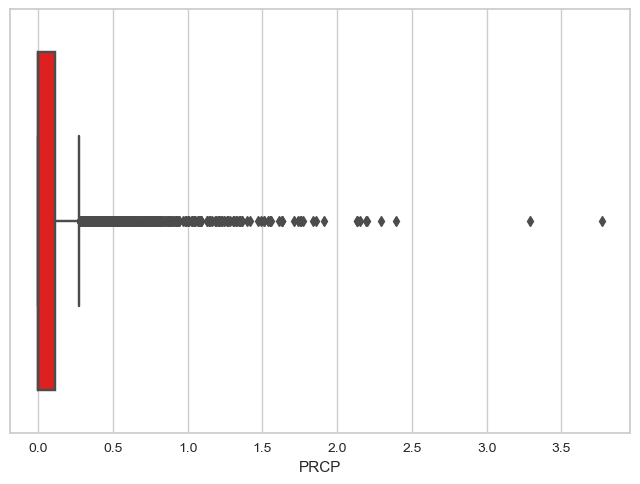

TMAX


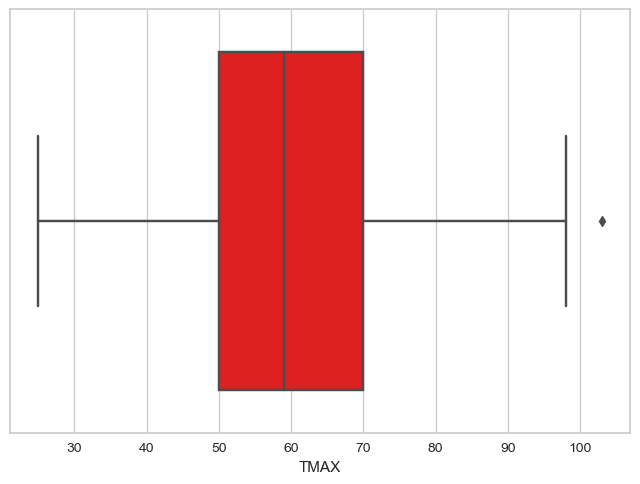

TMIN


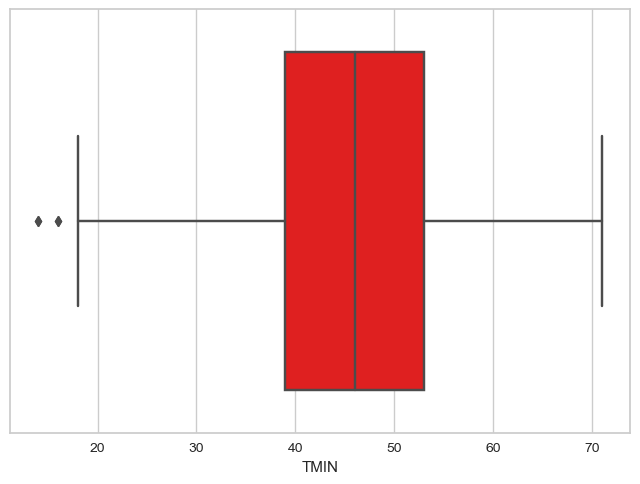

In [85]:
for col in seattle_test.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = seattle_test[col], data = seattle_test, color = 'red')
    plt.show()

In [86]:
def Outlier(var):
    for x in var.iloc[:, :].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_test = Outlier(seattle_test)

PRCP


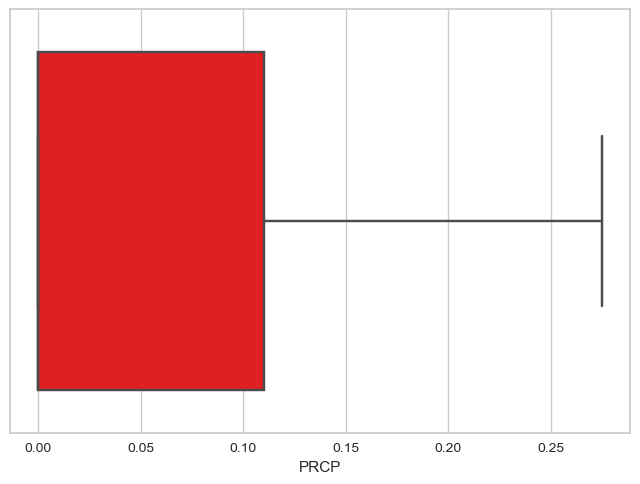

TMAX


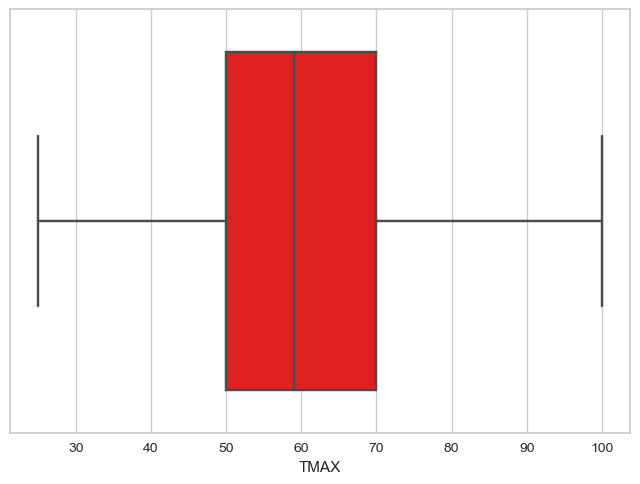

TMIN


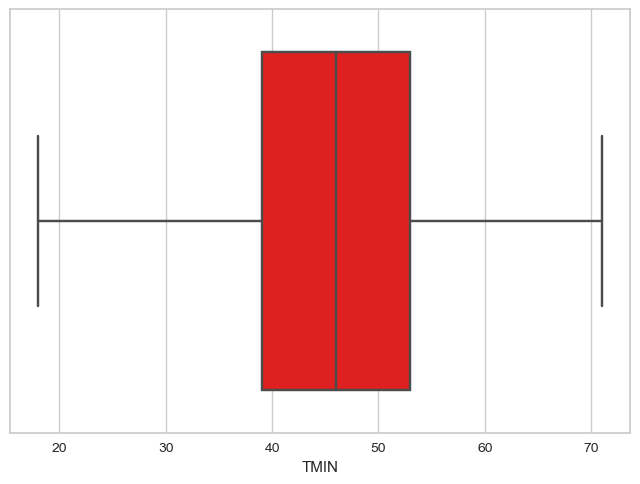

In [87]:
for col in seattle_test.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = seattle_test[col], data = seattle_test, color = 'red')
    plt.show()

In [88]:
df_test.head()

,PRCP,TMAX,TMIN
0,0.00,54.0,37.0
1,0.14,51.0,38.0
2,0.13,48.0,44.0
3,0.01,51.0,38.0
4,0.00,53.0,35.0


In [89]:
df_test = scaler.transform(df_test)

In [90]:
predicted_test = bag_clf.predict(df_test)

In [91]:
predicted_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [92]:
test_df['RAIN'] = predicted_test

In [93]:
test_df['RAIN'] = le.inverse_transform(test_df['RAIN'])

In [95]:
test_df.head()

,PRCP,TMAX,TMIN,RAIN
0,0.00,54.0,37.0,False
1,0.14,51.0,38.0,True
2,0.13,48.0,44.0,True
3,0.01,51.0,38.0,True
4,0.00,53.0,35.0,False


In [96]:
test_df.to_csv('submission_seattle.csv', index = False, header = False)